<a href="https://colab.research.google.com/github/Jayakrishna155/MachineLearning/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Datasets/spam.csv");
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
data['spam'] = data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.Message,data.spam,test_size=0.2);

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
x_train_count = vec.fit_transform(x_train.values)
x_train_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)


MultinomialNB()

In [18]:
msg = "England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+"
msg_count = vec.transform([msg])
print(msg_count)
print(model.predict(msg_count))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 22 stored elements and shape (1, 7696)>
  Coords	Values
  (0, 305)	1
  (0, 338)	1
  (0, 518)	1
  (0, 674)	2
  (0, 2376)	1
  (0, 2502)	1
  (0, 2557)	2
  (0, 3132)	1
  (0, 4254)	1
  (0, 4467)	1
  (0, 4658)	1
  (0, 4717)	1
  (0, 5235)	1
  (0, 5898)	1
  (0, 6684)	2
  (0, 6763)	1
  (0, 6878)	2
  (0, 7013)	1
  (0, 7045)	1
  (0, 7151)	1
  (0, 7308)	1
  (0, 7694)	1
[1]


In [19]:
x_test_count = vec.transform(x_test)
model.score(x_test_count,y_test)

0.9811659192825112

In [20]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])


In [22]:
clf.fit(x_train,y_train)
clf.predict([msg])


array([1])

In [23]:
clf.score(x_test,y_test)

0.9811659192825112

#2.) Wine Class Prediction

In [27]:
from sklearn.datasets import load_wine
data  = load_wine()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [30]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis='columns'),df.target,test_size=0.2)

In [48]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9444444444444444

In [49]:
model = MultinomialNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8055555555555556

In [53]:
y_pred = model.predict(x_test)
print(y_test[:5],y_pred[:5])
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

114    1
108    1
60     1
32     0
175    2
Name: target, dtype: int64 [1 1 2 0 2]


array([[10,  2,  0],
       [ 1,  7,  2],
       [ 2,  0, 12]])

Text(95.72222222222221, 0.5, 'Truth')

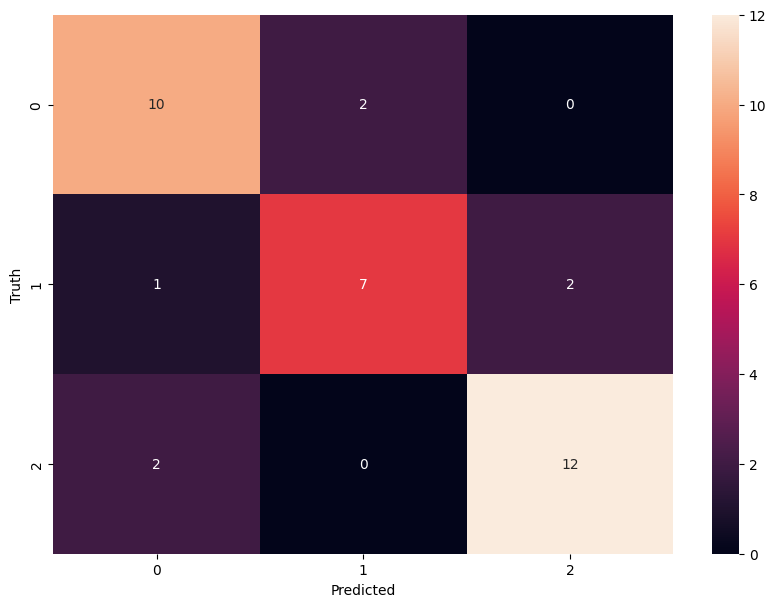

In [56]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')